In [95]:
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")
df = df.drop(columns=["Unnamed: 0"])

In [96]:
df.head(10)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [97]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [98]:
pd.set_option('display.max_rows', None)
print(df['track_genre'].value_counts())

track_genre
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
pop-film             1000
piano                1000
party                1000
pagode               1000
opera                1000
new-age              1000
mpb                  1000
minimal-techno       1000
metalcore            1000
metal                1000
mandopop             1000
malay                1000
latino               1000
latin                1000
kids                 1000
k-pop                1000
jazz                 1000
j-rock               1000
j-pop                1000
j-idol               1000
j-dance              1000
iranian              1000
psych-rock           1000
punk                 1000
afrobeat             1000
r-n-b                1000
turkish              1000
trip-hop             1000
trance               1000
techno               1000
tango                1000
synth-pop            1000
swedish              1000


In [99]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [100]:
#print the row that has missing album name
df[df['album_name'].isnull()]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


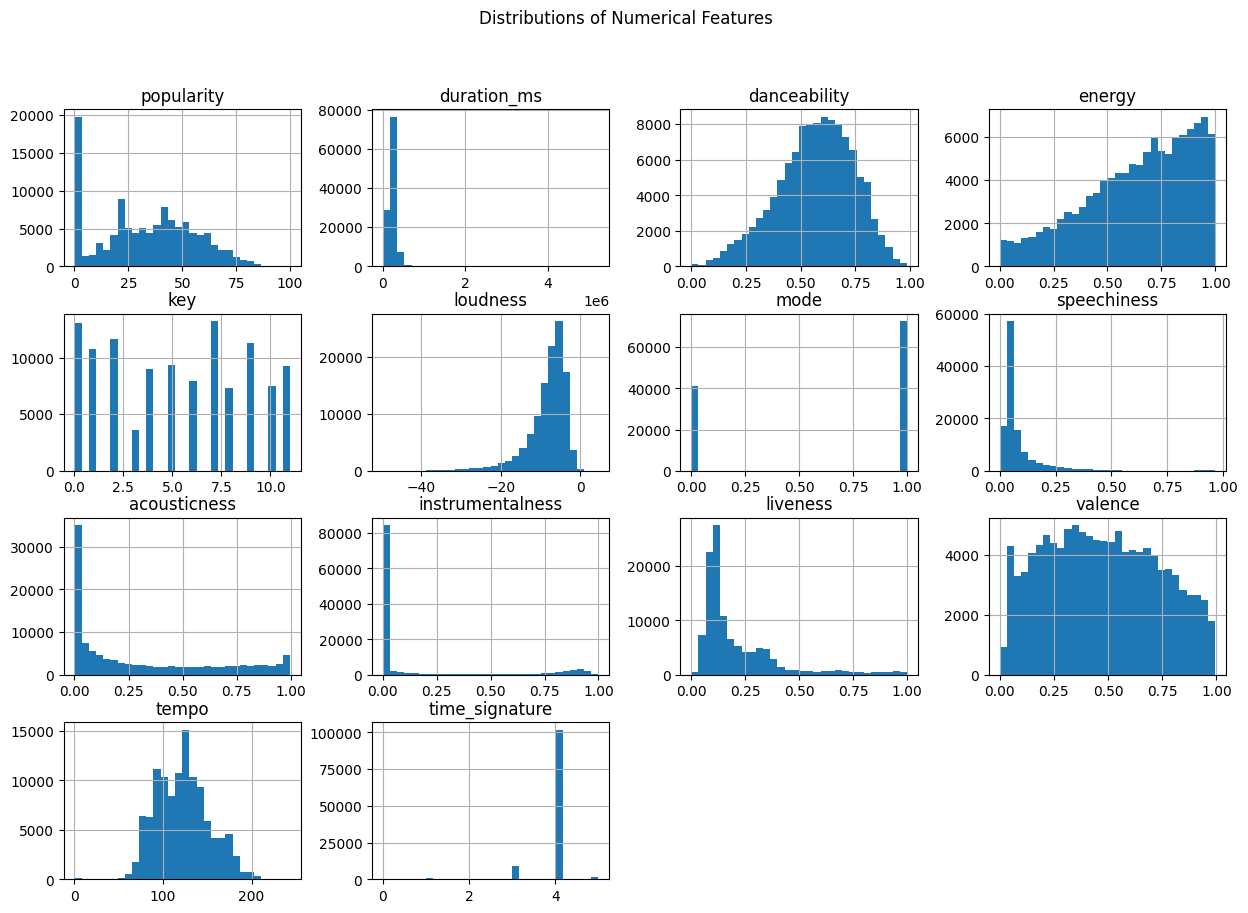

In [101]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_features].hist(figsize=(15, 10), bins=30)
plt.suptitle('Distributions of Numerical Features')
plt.show()


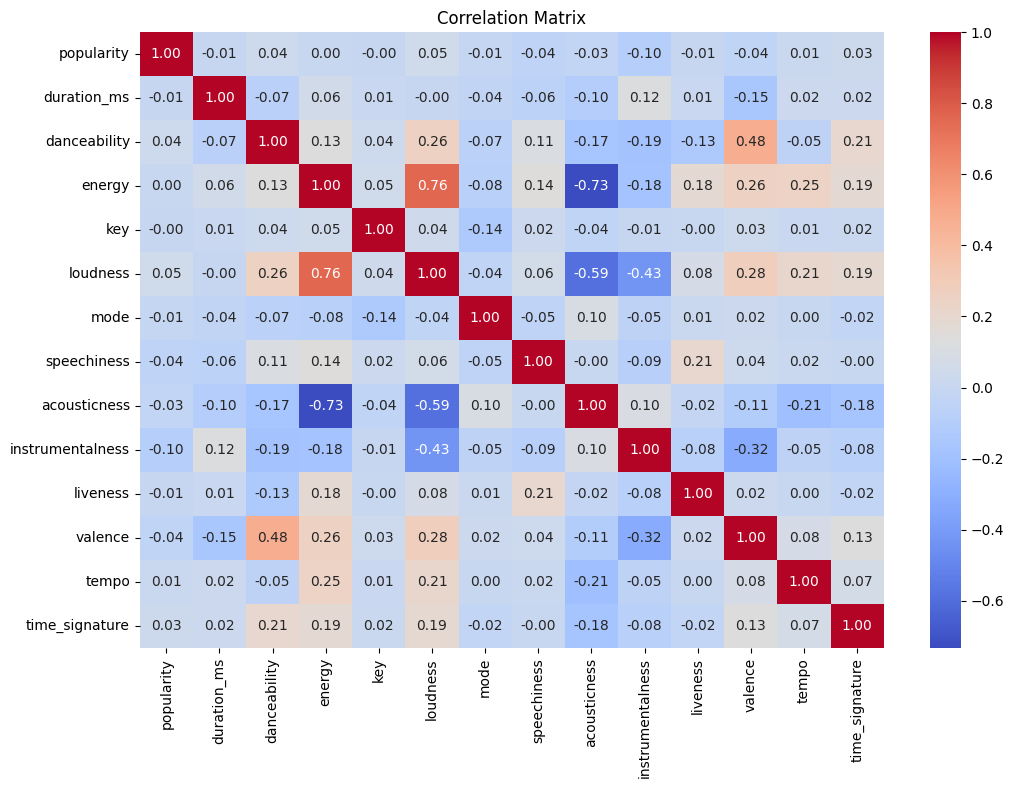

In [102]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [103]:
lr_all = LogisticRegression(solver='liblinear')
X_train, X_test, y_train, y_test = train_test_split(df[numerical_features], df['explicit'], test_size=0.2, random_state=12345)
y_test = y_test.to_frame()
lr_all.fit(X=X_train, y=y_train)
lr_all.intercept_, lr_all.coef_

(array([-0.0001415]),
 array([[ 1.59840905e-03, -6.33835159e-06,  2.48364517e-05,
          8.36136140e-05, -5.87569647e-04,  4.77959887e-03,
         -2.01533845e-04,  1.51805442e-04, -2.81444190e-04,
         -1.88513572e-04,  1.69425202e-06, -9.77899991e-05,
         -8.30639615e-03, -4.27854267e-04]]))

In [104]:
twenty_sample_y = y_test.sample(n=20, random_state=76)
twenty_sample_X = X_test.loc[twenty_sample_y.index]

In [105]:
print(type(y_test))
pred_val_sample = pd.DataFrame(dict(
    explicit = twenty_sample_y['explicit'],
    lr_predict = lr_all.predict_proba(twenty_sample_X)[:,1],
    lr_predict_binary = lr_all.predict(twenty_sample_X)))
pred_val_sample

<class 'pandas.core.frame.DataFrame'>


,explicit,lr_predict,lr_predict_binary
5538,False,0.068864,False
80675,False,0.052363,False
17523,False,0.080800,False
38083,True,0.084406,False
15220,False,0.117732,False
80884,False,0.101610,False
102016,False,0.091872,False
89461,False,0.163921,False
87924,False,0.051530,False
30829,False,0.112030,False


In [106]:
conf_lr = metrics.confusion_matrix(y_true=pred_val_sample['explicit'],
                                   y_pred=pred_val_sample['lr_predict_binary'])
conf_lr

array([[18,  0],
       [ 2,  0]])

In [107]:
# Logistic regression
(conf_lr[0, 0] + conf_lr[1, 1]) / conf_lr.sum()

0.9

In [108]:
# Logistic regression
metrics.accuracy_score(y_true=pred_val_sample['explicit'],
                       y_pred=pred_val_sample['lr_predict_binary'])

0.9

In [109]:
# Logistic regression
(conf_lr[1, 1]) / conf_lr[1,:].sum()

0.0

In [110]:
metrics.recall_score(y_true=pred_val_sample['explicit'],
                     y_pred=pred_val_sample['lr_predict_binary'])

0.0

In [111]:
# Logistic regression
(conf_lr[0, 0]) / conf_lr[0,:].sum()

1.0

In [112]:
# Logistic regression
metrics.recall_score(y_true=pred_val_sample['explicit'],
                     y_pred=pred_val_sample['lr_predict_binary'],
                     pos_label=0)

1.0

In [113]:
px.histogram(pred_val_sample, x='lr_predict', color='explicit',
             nbins=20, opacity=0.5,
             barmode='overlay')